# 1. 추천 시스템이란?
- 개인에 맞는 것을 추천하는 알고리즘
- 고객 만족도 증가 + 기업의 매출 증가

## 1-1. 사용되는 데이터의 종류와 특징
1. 명시적 데이터
    - 사용자가 선호도를 직접 표현한 데이터(평점 등)
    - 얻기 쉽지 않음.
    - 시간에 따라 취향과 선호도가 변함
2. 암시적 데이터
    - 행동 기반으로, 선호도가 간접 표현된 데이터(영상 시청 시간 등)
    - 높은 수치가 높은 선호도를 의미하지는 않는다!!!
    - 얻기는 쉽지만, 선호도를 직접적으로 알 수 없다.

## 1-2. 추천시스템의 분류
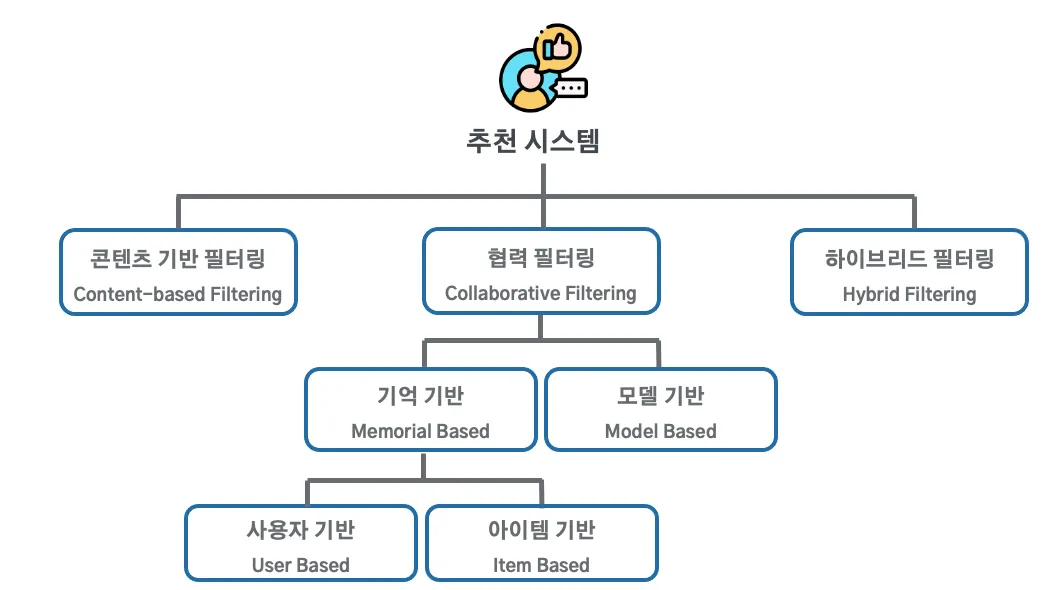

1. 내용 기반 필터링
    - 사용자가 선택한 콘텐츠와 유사한 것 기반으로 추천
    - 한 사용자의 행동 기준으로 추천
2. 협업 필터링
    - 서비스 내 다수의 사용자가 선호한 것 기반으로 추천
    - 사용자 간 선호도를 고려하여 선택한다.
    - 사용자 기반: 유사한 취향의 사용자 / 아이템 기반: 유사 아이템
    - 여러 사용자의 행동 기준으로 추천
3. 하이브리드 필터링
    - 추천시스템 알고리즘 조합

# 2. 내용 기반 필터링
사용자 프로필과 아이템 특징의 일치도를 계산하여 추천한다.
  - 사용자 프로필: 이전에 좋아했던 항목의 특징을 모아둔 데이터.
    - Input : 사용자 item에 대한 등급
    - Output : 사용자 등급을 주는 것에 맞는 classifier 생성

## 2-1. 유사도

유사도: 수학적 개념
1. 아이템 정보 데이터 벡터화 → 벡터 간 유사도 측정
2. 유사도 기반으로 선호 아이템과 비교 → 유사도가 높은 아이템 선별<br/><br/>

유사도 방식의 종류
- 자카드: 교집합 크기 이용
- 코사인: 벡터 사이 각도 이용, 값이 작으면 유사하다.
- 유클라디안 거리: 벡터 사이 거리 이용, 값이 작으면 유사하다.
- 피어슨 상관계수: 벡터 간 선형 상관관계 이용

## 2-2. 사용자 프로필

추천 시스템에 사용되는 데이터를 말한다.<br>
좋은 사용자 프로필을 구성하면 추천 시스템의 정확도와 만족도가 높아진다.

1. 직접 지정형: 자신이 선호하는 특징을 명시적으로 요청하는 방법
    - OTT 가입 시 선호도를 체크해야 하는 경우
2. 간접 지정형: 과거 행동 기반으로 프로필 작성


**사용자 프로필 흭득 방법**
1. 사용자 아이템의 특성 가중치 평균값을 활용한다.
2. 기호 파악, 설문조사, 키워드 입력 등으로 프로필 획득
3. 아이템에 대한 유저 평가를 바탕으로 분류 문제를 해결하듯이 푼다.


## 2-3. 아이템 특징

- items을 벡터로 표현(도메인에 따라 방식이 다르다)
    - 책, 음악, 이미지 도메인 등
- 컨텐츠의 내용 분석을 위한 알고리즘
    - 군집화, 머신러닝, TF-IDF

### TF-IDF(Term Frequency-Inverse Document Frequency)
단어 빈도(TF, 특정 문서)와 역문서 빈도(IDF, 전체 문서) 통해 빈출 단어를 찾고 가중치를 계산하는 방법
- $TF(d,t)$ : 특정 문서 d에서의 특정 단어 t의 등장 횟수
- $DF(t)$ : 특정 단어 $t$가 등장한 문서의 수
- $IDF(d,t) = log(\frac{n}{1+df(t)})$
- $TF-IDF = TF(d,t) \times IDF(d,t)$

각 단어가 그 문서에서 얼마나 중요한지를 나타내는 값이다!!

## 2-4. 장단점
### 장점
- 추천된 이유를 설명하기 용이하다.
- 콜드 스타트 문제를 해결할 수 있다.
    - 콜드스타트: 정보 부족해서 추천 잘 못하는 거

### 단점
- 피처 추출을 잘 못하면 정확도가 떨어진다.
- 새로운 장르 아이템을 추천하기 어렵다.

# 3. 협업 필터링
가정: 비슷한 선호도 사용자들은 앞으로도 비슷한 거 좋아할 거야!

- 기존 사용자들과 아이템의 상관관계를 기반으로 예측
- 평점을 기반으로 추천이 이루어짐
- in: 아이템에 대한 사용자의 등급
- out: 비슷한 사용자, 아이템 등급

## 3-1. 메모리 기반 협업 필터링

사용자/아이템 간 유사도 기반 추천

### 1. 사용자 기반: 너랑 비슷한 고객이 이것도 샀어
- 유사한 다른 유저들의 평점을 활용한다.
- 유저 간 유사도가 높을 수록 가중치 부여
- 아이템 수가 사용자 수보다 많을 때
- 아이템이 수시로 바뀔 때, 사용자 유입이 적을 때
- 다양성을 챙길 때

### 2. 아이템 기반: 이거 고른 사람들은 저것도 골랐어
- 유사한 아이템의 평점을 활용한다.
- 아이템 수가 사용자 수보다 적을 때
- 아이템이 잘 안 바뀔 때
- 다양성은 부족
- 계산이 빠르다.

### 3. 메모리 기반 협업 필터링의 한계
- 확장성이 낮다.
- 평점/선호도 데이터가 적으면 성능이 저하된다.

## 3-2. 모델 기반 협업 필터링
== 잠재 요인 협업 필터링
- user-item 평점 행렬에 있는 잠재 요인을 추출해 추천하기

### 1. 메모리 기반 협업 필터링의 한계와 모델 기반 협업 필터링
- 메모리 기반은 유사도에 의존하기 때문에 숨겨진 선호 요인/아이템 특성을 반영하지 못함. 따라서 진짜 취향을 반영하기 어려움.
- 모델 기반은 잠재 요인을 수치적으로 학습한 후 평점을 예측한다.

### 2. 잠재 요인과 행렬 분해

#### 잠재 요인
- 모델이 수치적으로 추정하려는 값이 잠재 요인
- 실제 데이터에는 없지만 평점 패턴을 분석하여 추정할 수 있음.
- Latent Factor Model: 주어진 행렬을 (사용자-잠재), (아이템-잠재)로 나눠 학습함.
    - 축이 의미하는 바와 몇 개의 차원이 존재하는지 알 수 없다.
    - 맵핑 후 거리나 각도로 선호도 파악
    - rank-2 factorization
- Factor model: 하나의 좌표로 아이템/유저 구분없이 표현한다.

#### 행렬 분해
- 사용자-아이템 행렬을 분해해서 잠재요인 파악하기
- $R \in R^{m*n}, Q \in R^{n*k}, P\in R^{m*k}$
- $R≈QP^T$



- R: User-Item Rating Matrix (기존 행렬)
- Q: k차원의 User Latent Matrix
- P: k차원의 Item Latent Mat
- R: User-Item Rating Matrix (기존 행렬)
- Q: k차원의 User Latent Matrix
- P: k차원의 Item Latent Matrix


> 모델기반은 행렬 분해를 통해 잠재 요인 벡터를 만들고, 그 벡터 간 내적을 통해 예측

# 4. 추천시스템 평가

### 오프라인 평기(실시간 연동X)
- 과거 로그를 사용해서 정밀도 평가
- 비용이 낮고, 결과 분산이 작다.
- 과거 기반이기 때문에 목표에 기여하지 못할 수도
- 예측 오차(MAE, MSE, RMSE), 집합 평가(precision, recall, f1), 순위 평가(PR, MRR, AP, mAP, nDCG) 지표 등

### 온라인 평가 (실시간 연동O)
- 새로운 추천 모델을 실제로 표시함으로써 평가
- 반영 여부를 즉각적으로 확인할 수 있다.
- 비싸다. 만족도가 떨어질 수 있다.
- A/B 테스트, 인터리빙

### 사용자 스터디
- 직접 인터뷰나 설문을 통해 평가
- 새로운 개선점을 발견할 수 있다.
- 분산이 크고 재현성이 떨어진다.

# 5. 최근 추천시스템 연구 동향
- 자연어 처리 기반으로 연구되고 있다.
- transformer, GRU 등